<a href="https://colab.research.google.com/github/JavBurgoa/Machine-Learning-Course-2days/blob/main/mnist_JavierNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# MNIST digit classification: Classical ML

## 1. The dataset

The MNIST dataset<sup>1</sup> (Modified National Institute of Standards and Technology dataset) is a large dataset containing pre-processed **28x28 pixel** images of handwritten digits. The dataset is widely used for training and testing in the field of machine learning.

<sub>[1] THE MNIST DATABASE of handwritten digits, Yann LeCun, Courant Institute, NYU Corinna Cortes, Google Labs, New York Christopher J.C. Burges, Microsoft Research, Redmond.</sub>

Let's load this dataset. As this is a widely used dataset in Machine Learning, it can be loaded straight from the [openml.org](https://www.openml.org/) public repository with the following Scikit-learn function: 

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

The `fetch_openml()` function returns a Python [dictionary-like object](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html). The actual data can be obtained with the following keys:

- data: np.array, scipy.sparse.csr_matrix of floats, or pandas DataFrame
- target: np.array, pandas Series or DataFrame

Let's explore the feature vectors:

In [ ]:
print("Length of feature vector: {}\n".format(len(mnist.data[0])))
print("Example of feature vector:\n")
print(mnist.data[0])

Length of feature vector: 784

Example of feature vector:

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 25

Each image in the loaded dataset is represented by a 784 dimensional vector with one gray-scale value (0 means black, 255 means white) for each of the 28x28 pixels.

We can reshape this feature vector to the gray-scaled image as follows:

In [ ]:
mnist.data[0].reshape((28,28))

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

We will denote the feature vectors as `X` and the corresponding labels as `y`:

In [ ]:
X = mnist.data
y = mnist.target

print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']


Notice that the labels are Python objects (strings):

In [ ]:
print(y)

['5' '0' '4' ... '4' '5' '6']


We convert these to numbers (integers):

In [ ]:
y = mnist.target.astype('int64')

In [ ]:
import seaborn

We can use the Python [matplotlib](https://matplotlib.org/) library to plot the digit images in `X` (the label for each image is shown in the title):

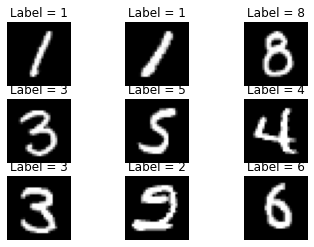

In [ ]:
import matplotlib.pyplot as plt
from random import randint

# Display 9 randomly selected images
for c in range(1, 10):
    plt.subplot(3, 3,c)
    i = randint(0,X.shape[0])
    im = X[i].reshape((28,28))
    plt.axis("off")
    plt.title("Label = {}".format(y[i]))
    plt.imshow(im, cmap='gray')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

It is 'best practice' in Machine Learning to normalize the feature values such that all features have values with the same 'not to large' scale. This facilitates faster convergence during training.

Scikit-learn has functions to normalize features in `sklearn.preprocessing`. The most common ones are [`MinMaxScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) and [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

We will use the `MinMaxScaler()`:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

print(X[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

To evaluate our trained model we need to first create an independent test set with images that are not used during training:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=True, random_state=42)

## 2. The model

Now we are ready to define our model. We will fit a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model:

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

Each Scikit-learn model has a function `fit()` that optimizes the modelparameters to minimize the cost function:

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression()

We can access the modelparameters of the fitted logistic regression model as follows: 

In [ ]:
print(clf.coef_)
print(clf.intercept_)

TypeError: ignored

As the Scikit-learn implementation of logistic regression performs a one-vs-all multi-class apporach we get 10 lists of modelparameters and 10 intercepts, one for each of the 10 classes.

Let's plot the modelparameters for each class as a 28x28 image:

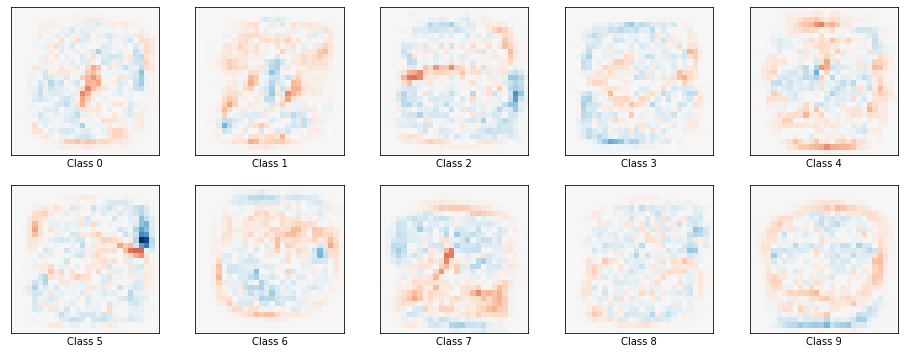

In [ ]:
import numpy as np

coef = clf.coef_
scale = np.abs(coef).max()
plt.figure(figsize=(16,6))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale)
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

  ####### Notes
  # Here we have fitted a logistic model for each number intependently. Each pizel is a variable (x1, x2 etc in the formula) with a particular theta. The theta specifies whether you want that variable
  # to be high for that pixel in that particular label, so when plotting it here it shows you that for the 0 for example, a ring is good, and an empty center is also good, plus the borders of the canvas are not important at all (0 * x = 0)

Each Scikit-learn model also has a function `predict()` that applies the fitted model to compute class lables for feature vectors:

In [ ]:
# Perform the predictions
y_predicted = clf.predict(X_test)

print(y_predicted)

['8' '4' '5' ... '7' '7' '2']


## 3. Evaluation

Scikit-learn offers many [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) for evaluating the prediction performance. The most common metric is `accuracy`:

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy = {}%".format(accuracy_score(y_test, y_predicted)*100))

Accuracy = 91.94285714285715%


To get more insight into the prediction errors for each class we can compute a confusion matrix:

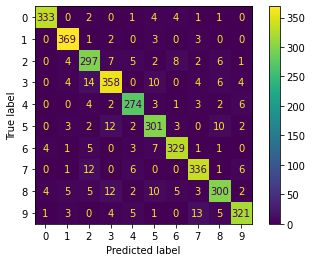

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
plt.show()

Scikit-learn also offers a `classification_report()` function that computes metrics that are more suitable for imbalanced multi-class classification tasks:

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted, labels=range(0,10)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       346
           1       0.95      0.98      0.96       378
           2       0.87      0.89      0.88       332
           3       0.90      0.90      0.90       400
           4       0.92      0.93      0.92       295
           5       0.88      0.90      0.89       335
           6       0.94      0.94      0.94       351
           7       0.92      0.93      0.92       362
           8       0.90      0.86      0.88       348
           9       0.94      0.91      0.92       353

   micro avg       0.92      0.92      0.92      3500
   macro avg       0.92      0.92      0.92      3500
weighted avg       0.92      0.92      0.92      3500



Now, let's take a look a the misclassified images in the test set: 

In [ ]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_predicted):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
    
print("Number of misclassified test set images: {}".format(len(misclassified_images)))

Number of misclassified test set images: 282


Let's plot some of these:

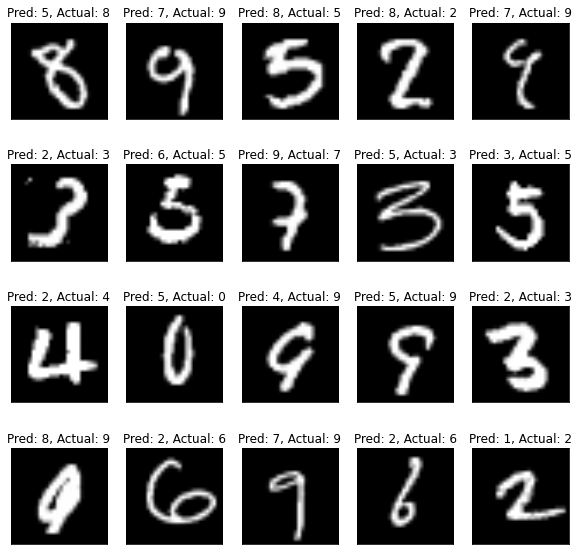

In [ ]:
plt.figure(figsize=(10,10))
for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(28,28), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {y_predicted[bad_index]}, Actual: {y_test[bad_index]}');

## 4. Hyperparameter optimization

Scikit-learn offers [many functions](https://scikit-learn.org/stable/modules/grid_search.html) for hyperparameter optimization. We will use `GridSearchCV()` that evaluates different hyperparamter value combinations using cross-validation.

In `GridSearchCV()` you define the hyperparameter values to consider as a Python dictionary:  

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
    "C":np.logspace(-3,3,7)
}

print(grid)

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}


Next, we can initialize `GridSearchCV()` just like any other model in Scikit-learn:

In [ ]:
clf_cv = GridSearchCV(clf, grid, cv=5, verbose=2, scoring='f1_macro')

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='f1_macro', verbose=2)

Now we can just call the `fit()` function again to fit all the models and evaluate their prediction performance with the cross-validation procedure:

In [ ]:
idx = np.random.choice(len(X_train),1000,replace=False)
X_train_small = X_train[idx]
y_train_small = y_train[idx]

In [ ]:
clf_cv.fit(X_train_small,y_train_small)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.1s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END .............................................C=0.01; total time=   0.4s
[CV] END .............................................C=0.01; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='f1_macro', verbose=2)

A fitted `GridSearchCV()` has an attribute `cv_results_` that contains the cross-validation scores for each of the hyperparameter value combinations considered. The following code creates a Pandas Dataframe from `cv_results_` for easy visualization:

In [ ]:
import pandas as pd

result_cv = pd.DataFrame()
result_cv["param_C"] = clf_cv.cv_results_["param_C"].data
result_cv["score"] = clf_cv.cv_results_["mean_test_score"]

result_cv

,param_C,score
0,0.001,0.690723
1,0.01,0.843486
2,0.1,0.868491
3,1.0,0.857103
4,10.0,0.847709
5,100.0,0.849473
6,1000.0,0.850943


A fitted `GridSearchCV()` also has attributes `best_estimator_` and `best_score_` that contain the best performing model and its corresponding cross-validation score respectively: 

In [ ]:
print(clf_cv.best_estimator_)
print(clf_cv.best_score_)

LogisticRegression(C=0.1)
0.8684905665026296


A fitted `GridSearchCV()` also has the function `predict()` that applies `best_estimator_` to predict the classes:

In [ ]:
y_predicted = clf_cv.predict(X_test)

print(classification_report(y_test, y_predicted, labels=range(0,10)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       346
           1       0.86      0.96      0.91       378
           2       0.86      0.81      0.83       332
           3       0.82      0.84      0.83       400
           4       0.86      0.86      0.86       295
           5       0.83      0.81      0.82       335
           6       0.92      0.91      0.91       351
           7       0.88      0.88      0.88       362
           8       0.85      0.79      0.82       348
           9       0.86      0.84      0.85       353

   micro avg       0.87      0.87      0.87      3500
   macro avg       0.87      0.86      0.86      3500
weighted avg       0.87      0.87      0.87      3500



In [ ]:
clf = LogisticRegression(C=1)

clf.fit(X_train,y_train)

y_predicted = clf.predict(X_test)

print(classification_report(y_test, y_predicted, labels=range(0,10)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       346
           1       0.95      0.98      0.96       378
           2       0.87      0.89      0.88       332
           3       0.90      0.90      0.90       400
           4       0.92      0.93      0.92       295
           5       0.88      0.90      0.89       335
           6       0.94      0.94      0.94       351
           7       0.92      0.93      0.92       362
           8       0.90      0.86      0.88       348
           9       0.94      0.91      0.92       353

   micro avg       0.92      0.92      0.92      3500
   macro avg       0.92      0.92      0.92      3500
weighted avg       0.92      0.92      0.92      3500



The `predict()` function returns the classes only. The logisitic regression algorithm 'predicts' probabilities for each class. The `predict_proba()` functions returns these probabilities:

In [ ]:
y_predicted = clf.predict_proba(X_test)

These are the class probability predictions for the first instance in the test set `y_test`:

In [ ]:
print(y_predicted[1])

[8.06408059e-11 1.89467803e-11 2.07079797e-09 1.15862819e-06
 9.98362975e-01 2.39173483e-06 1.00764355e-08 3.25550477e-04
 3.29798400e-06 1.30461402e-03]


This is the true class of this instance:

In [ ]:
print(y_test[1])

4


# Competition code

Competition from https://www.kaggle.com/competitions/a-tour-of-machine-learning-2021/data?select=sample_submission.csv

In [1]:
import pandas as pd
test = pd.read_csv("/content/data_test.csv")
X_train = pd.read_csv("/content/data_train.csv")

y_train = X_train.pop("Label")

Now let's choose a model

In [2]:
X_train

,GeneId,H3K4me3_0,H3K4me1_0,H3K36me3_0,H3K9me3_0,H3K27me3_0,H3K4me3_1,H3K4me1_1,H3K36me3_1,H3K9me3_1,...,H3K4me3_98,H3K4me1_98,H3K36me3_98,H3K9me3_98,H3K27me3_98,H3K4me3_99,H3K4me1_99,H3K36me3_99,H3K9me3_99,H3K27me3_99
0,7008,1,1,2,1,3,1,2,5,0,...,2,11,15,5,2,2,10,12,2,2
1,9839,0,0,1,1,0,2,0,2,0,...,1,1,0,0,0,1,1,0,0,0
2,11972,7,3,1,1,1,4,2,1,1,...,1,1,0,2,0,1,1,1,1,0
3,14705,4,2,4,1,3,0,2,1,1,...,3,1,2,4,2,4,3,0,0,0
4,12058,1,1,2,0,8,0,2,1,1,...,2,1,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431,14148,1,1,1,0,0,2,0,2,0,...,1,0,0,0,2,0,0,0,1,2
10432,11660,0,1,2,0,0,0,0,1,0,...,2,2,0,2,2,0,1,1,0,3
10433,2529,0,3,3,0,2,2,6,3,1,...,0,1,1,1,1,1,0,0,0,1
10434,4034,1,0,1,1,0,0,1,0,0,...,2,12,15,0,0,0,4,5,0,2


In [4]:
import seaborn
#X_train.iloc[:, 1:].boxplot()
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.boxplot(x="variable", y="value", data=pd.melt(X_train.iloc[:,1:2].T))

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1d9e0c1560> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f1d9e0ca050> (for post_execute):


KeyboardInterrupt: ignored

Boxplot per column (modification). We see they all have simmilar valeues. But most of em are outliers so it's diffuclut to see.

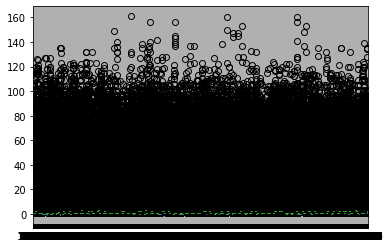

In [36]:
import seaborn
def format_boxplot(df, genename, colname):
  
  output = df.T
  output.columns=output.iloc[0]
  output=output.iloc[1:]
  
  return output

data = format_boxplot(X_train, 7008, "H3K4me3_0")
data.boxplot()

TypeError: ignored

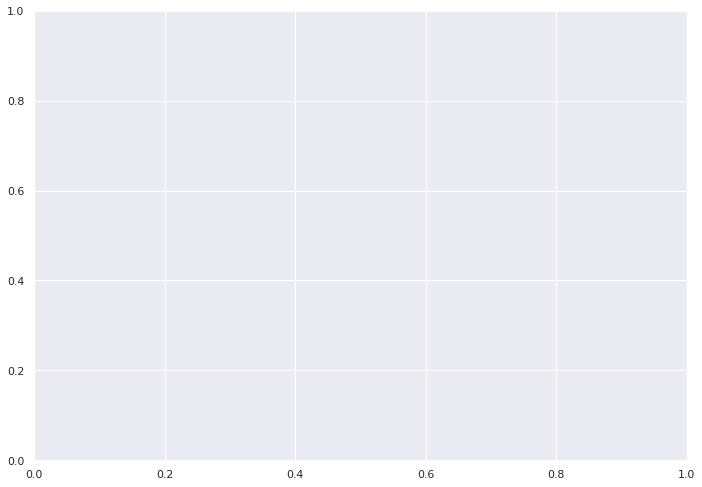

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

#gene_ids = X_train.pop("GeneId")
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.boxplot(x= "variable", y = "value", data = pd.melt(X_train_norm))

In [33]:
X_train.T["label"]

KeyError: ignored

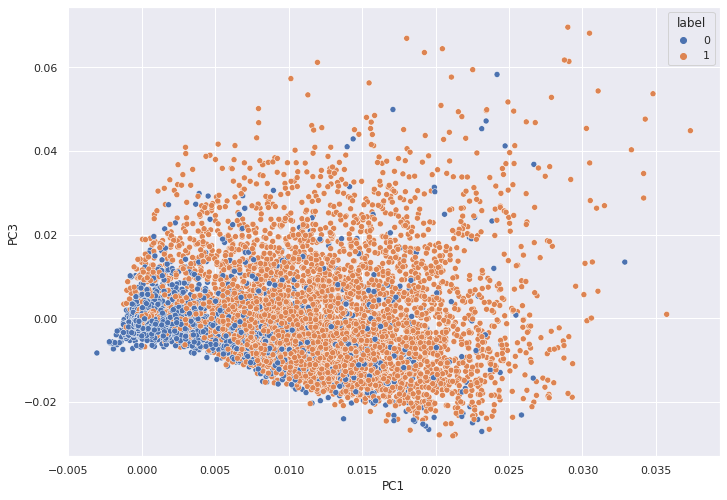

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_train.T) 
pca_data = pd.DataFrame({"PC1":pca.components_[0], "PC2":pca.components_[1], "PC3": pca.components_[2],"label":y_train})
seaborn.scatterplot(data=pca_data, x = "PC1", y = "PC3", hue="label")

Doesn't seem like a linear classfier would work here. Each dot is a gene by the way

# Some tests with relevant features

In [26]:
#model = RandomForestClassifier(n_estimators=1000)
model = LogisticRegression(C=0.01, max_iter = 1000)
model = model.fit(X_train_norm, y_train)

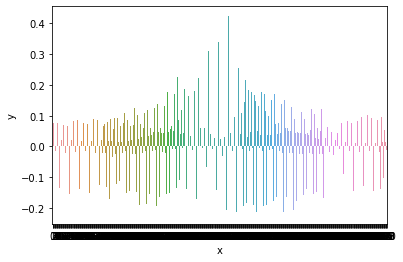

In [45]:
coeffs = pd.DataFrame({"x": range(0, len(model.coef[0])), "y":model.coef_[0]})
coeffs[["x"]] = coeffs[["x"]].astype("str")
seaborn.barplot(data = coeffs, x = "x", y = "y")

This above shows how in the center most modifications are not really releavnt except for some "outliers" of very high importance. Away from this centrer area, next to it seems to be also important

In [47]:
model.feature_importances_

array([0.00114452, 0.00108932, 0.00112908, 0.00110513, 0.0007466 ,
       0.00135064, 0.00128865, 0.00116939, 0.00098966, 0.000807  ,
       0.0010579 , 0.0016135 , 0.0012167 , 0.00116574, 0.00063534,
       0.00086304, 0.00125755, 0.00135586, 0.0011447 , 0.00061241,
       0.00096239, 0.00098629, 0.00121682, 0.00103349, 0.00079318,
       0.00122429, 0.00097907, 0.00128432, 0.00110568, 0.00070969,
       0.00118584, 0.00093371, 0.00114414, 0.0009826 , 0.0007787 ,
       0.0010866 , 0.00088849, 0.00111511, 0.0008927 , 0.00063037,
       0.00109729, 0.00103236, 0.00163212, 0.00082911, 0.00079197,
       0.00108188, 0.00114911, 0.00122322, 0.00084857, 0.00066474,
       0.00118755, 0.00115483, 0.0011316 , 0.00079224, 0.00055451,
       0.00131413, 0.00096959, 0.001027  , 0.00071703, 0.00056897,
       0.00126196, 0.00094049, 0.00120679, 0.00074292, 0.00072441,
       0.00116718, 0.00106457, 0.00139937, 0.00071864, 0.00066535,
       0.00151041, 0.00091628, 0.00131386, 0.00077816, 0.00062

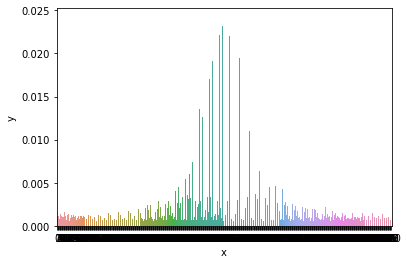

In [48]:
model = RandomForestClassifier(n_estimators=1000)
model = model.fit(X_train_norm, y_train)

coeffs = pd.DataFrame({"x": range(0, len(model.feature_importances_)), "y":model.feature_importances_})
coeffs[["x"]] = coeffs[["x"]].astype("str")
seaborn.barplot(data = coeffs, x = "x", y = "y")

Here we see the importance of each column. Some columns are very important to figure out what is highly expressed and what not.

In [ ]:

clf.coef_

In [9]:
submission = model.predict_proba(test)[:, 1]

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train_norm, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [18]:
submission = clf.predict_proba(test.iloc[:, 1:])[:, 1]

In [21]:
submission.mean()

0.9322660122354143

So, Gradient boost classifier is really bad, makes sense because this is to correct bias, but I have no clue whether we have bias so maybe I am creating a bias.

# Linear regression kernel
Trying the linear regression with a kernel (see if using higher diemtnonal spaces it can seprate the data).

In [35]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
krr = KernelRidge(alpha=1.0)
krr.fit(X_train_norm, y_train)

KernelRidge(alpha=1.0)

In [38]:
test

,GeneId,H3K4me3_0,H3K4me1_0,H3K36me3_0,H3K9me3_0,H3K27me3_0,H3K4me3_1,H3K4me1_1,H3K36me3_1,H3K9me3_1,...,H3K4me3_98,H3K4me1_98,H3K36me3_98,H3K9me3_98,H3K27me3_98,H3K4me3_99,H3K4me1_99,H3K36me3_99,H3K9me3_99,H3K27me3_99
0,5222,2,2,7,2,0,3,2,9,2,...,0,2,1,1,0,0,3,1,1,1
1,891,1,2,0,0,1,0,4,1,2,...,3,2,2,2,0,4,2,5,2,1
2,7219,1,1,2,4,4,2,2,1,1,...,1,3,1,1,0,0,1,1,1,0
3,7225,1,5,2,4,1,0,8,3,4,...,0,2,1,1,2,1,1,0,2,0
4,9432,1,16,3,2,2,2,7,0,4,...,0,1,2,0,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,7987,0,0,0,1,2,5,1,2,4,...,3,0,12,2,1,7,1,21,7,2
5045,5046,1,3,3,0,3,0,0,2,1,...,1,3,15,3,1,0,3,14,4,0
5046,13738,0,5,2,1,1,1,6,3,0,...,0,1,2,1,1,0,0,2,2,0
5047,9341,7,1,0,2,3,3,0,0,2,...,4,0,0,2,0,7,1,2,0,1


In [39]:
krr.predict(test.iloc[:, 1:])

array([75.82808915, 15.37788746, 10.4585697 , ..., 71.4588898 ,
       11.04313781, 70.50812088])

In [ ]:
I dont know how this works

Conclussion, using Gradientlogistic regression works the best for dome people here. Adaboost causes bias although it could also be due to lack of QC of the data. I did a minmax normalization isntead of log whihc might be better for this kind of daat (lots of very low values while high values skewe everything.)
The PCA can be useful some times. In the end the best is focusing on trying differnt methods and pre-processing.